#Project -- Online News Popularity -- Case Study

# Data Set: Online News Popularity Data Set 

Source: https://archive.ics.uci.edu/ml/datasets/online+news+popularity#
<br> Note: Don't use the file from this URL. Rather use the dataset attached with project as column names are changed to remove spaces.


**Attribute Information:<br>**
Number of Attributes: 61 including target column -- shares

Attribute Information: 
0. url: URL of the article 
1. timedelta: Days between the article publication and the dataset acquisition
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

#### This note book is divided in two parts
#### Part 1 -- Explore, Understand the Data and If required perform Wrangling
#### Part 2 -- Apply various modeling techniques and use Root Mean Square Error (RMSE) to evaluate models

# Import Libraries

**Import the usual libraries **

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns
%matplotlib inline



# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

#### Start of Part I --  Explore, Understand the Data and If required perform Wrangling
#### Get the Data

** Use pandas to read data as a dataframe called df.**

In [6]:
df = pd.read_csv("OnlineNewsPopularity.csv")

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positiv

In [10]:
df.isnull().any()

url                               False
timedelta                         False
n_tokens_title                    False
n_tokens_content                  False
n_unique_tokens                   False
n_non_stop_words                  False
n_non_stop_unique_tokens          False
num_hrefs                         False
num_self_hrefs                    False
num_imgs                          False
num_videos                        False
average_token_length              False
num_keywords                      False
data_channel_is_lifestyle         False
 data_channel_is_entertainment    False
data_channel_is_bus               False
data_channel_is_socmed            False
data_channel_is_tech              False
data_channel_is_world             False
kw_min_min                        False
kw_max_min                        False
kw_avg_min                        False
kw_min_max                        False
kw_max_max                        False
kw_avg_max                        False


** Q1. Looking at the data above what are your first thoughts about quality of data and modeling? ** 

In [11]:
df.drop(["url","timedelta"],axis = 1, inplace = True)
#df.describe()

### Correlation of Features
Lets find the correlation among features (very important for successfull modelling)

We will plot correlation matrix using Plotly HeatMap

In [12]:
data = [
    go.Heatmap(
        z= df.astype(float).corr().values,
        x=df.columns.values,
        y=df.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

NameError: name 'go' is not defined

** Q2. What inference can be drawn from correlation heatmap? **

Quite a few features which are not coorelated hence good for modelling.

#### Start Of Part 2 -- Apply various modeling techniques

#### Common imports for modeling

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [17]:
# To ensure output is same each time code is run
random_state = 101     

Function to split the data

In [18]:
def get_data(df_data,test_size=0.3):
    X = df_data.copy()
    X.drop("shares",axis=1, inplace=True,)
    y = df_data["shares"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X,y,X_train, X_test, y_train, y_test

Function to perform Simple Linear Regression 

In [19]:
def perf_linear_regression(df_data,standscalar=False):
    X,y,X_train, X_test, y_train, y_test = get_data(df_data)
    if(standscalar):
        print ("Regression after applying StandardScaler")
        X_scaler = StandardScaler()
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)
        
#         y_scaler = StandardScaler()
# #         y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
# #         y_test = y_scaler.transform(y_test[:, None])[:, 0]
#         y_train = y_scaler.fit_transform(y_train)
#         y_test = y_scaler.transform(y_test)

       
     # End of If for StandardScaler  
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    y_train_pred = lm.predict(X_train)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) )
    print ("RMSE on Test Data  is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_pred))) )
    return X,y,X_train, X_test, y_train, y_test

** Approach 1: Linear Regression ** <br>
** Q3: What is the RMSE on Test Data for Linear Regression? **

In [20]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df)
print ("Median Value of Shares:", y.median())

RMSE on Train Data is: 12381.92 :
RMSE on Test Data  is: 11110.16 :
Median Value of Shares: 1400.0


** Q: 4.	Challenge Why Linear Regression should be used here ?**

4.	Linear Regression is a good starting point in case we need to predict continuous variables .  On Speed vs. Accuracy balance � it scores on Speed.  RMSE value from Linear Regression is a good indication that it is not sufficient

 ** Approach 2:  Use Standard Scaler to scale the data ** <br>
StandardScaler removes the mean and scales the data to unit variance. Standardization of a dataset is a common requirement for many machine learning estimators 

Calling Regression with Standard Scaler

** Q5: Is the RMSE better than in Approach 1 (Linear Regression) in this case? If Not Why ? **

In [21]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df,True)

Regression after applying StandardScaler
RMSE on Train Data is: 12381.64 :
RMSE on Test Data  is: 1913686794634.06 :


Standard Scalar behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). StandardScaler cannot guarantee balanced feature scales in the presence of outliers. Refer to http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
** So looks like Standard Scaling is bad choice **

Lets do analysis of target value y and see if there are outliers and we can get rid of them

In [22]:
    print ("\nPrinting shares count distribution data")
    data = y.value_counts(ascending=False)
    print (data)

# #print (y.value_counts(ascending=False))

# # print ("\nPrinting share count")
# # print (y.sort_values(ascending=False) )


Printing shares count distribution data
1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
1000      1177
1600      1137
1700      1013
1800       889
1900       810
2000       774
2100       661
2200       631
2300       511
2400       506
2600       442
2500       441
2700       435
2800       359
2900       356
3000       348
3100       306
3200       282
3400       271
3300       259
3500       252
3800       240
3600       233
3700       223
3900       200
          ... 
38400        1
139500       1
168          1
104          1
53           1
295          1
72100        1
92600        1
309          1
51500        1
277          1
43200        1
39700        1
149          1
67700        1
85           1
59400        1
8            1
80800        1
75600        1
34500        1
50700        1
42400        1
66900        1
72900        1
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64


** Approach 3: Detect Outlier and remove them from data set ** <br>

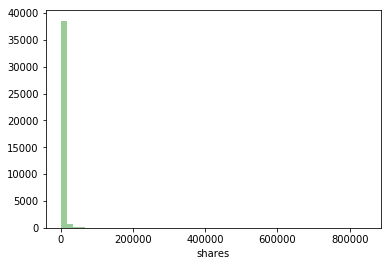

In [23]:
sns.distplot(y,kde=False,color="green");

In [24]:
data = [go.Bar(
            x=y.value_counts().index.values,
            # Use log of value_count to make graph more comprehendible 
            #y= np.log2(y.value_counts().values) 
            y= y.value_counts().values
    )]

py.iplot(data, filename='data-basic-bar',image_width=1200, image_height=1800)

NameError: name 'go' is not defined

** Q6: Which data -- based on shares count should be dropped from dataset ?** <br>
You can use just vizual cue here , we will have more formal approach in Capstone

In [ ]:
# # Lets get  a scatter plot of shares and respective counts
# y_unique = y.unique()
# sns.regplot(y_unique,y_unique,data=y,scatter=True)

** We can try multiple values, but here I will drop the data below 100,000 and then below 20,000 shares **

Define a generic function to filter data

In [ ]:
def filter_threshold_data(df_copy,threshold,column_name):
    df_adjusted = df_copy[df_copy[column_name] <= threshold]
    print (" Original Data Count:", len(df_copy))
    print (" After Adjusting Data Count:", len(df_adjusted))
    return df_adjusted

In [ ]:
df_adjusted = filter_threshold_data(df,100000,"shares")

** Q7: What is RMSE for data filtered at 100,000 and 20,000? What inference can you draw?**

In [ ]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df_adjusted)

In [ ]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df_adjusted)

7.	RMSE  for filter 100,000 � 5756.43, RMSE for filter 20,000 � 2670.63 
Key Point is outliers skew the model hence it is important to drop them for dataset


** Approach 4: Lets try improve the model by using DecisionTreeRegressor for regression ** <br>

** Q8. Why we should use DecisionTree? **

Reasons for using Decision Tree
1. Decision trees implicitly perform variable screening or feature selection
2. Nonlinear relationships between parameters do not affect tree performance
3. It is easy to interpret

#### Using Decision Tree Regressor
http://scikit-learn.org/stable/modules/tree.html#tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def decision_tree_regression(max_depth,X_train,y_train,X_test,y_test):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print ("Tree Max Depth is:", max_depth)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) )
    print ("RMSE on Test Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_pred))) )
    #print (model.decision_path)

    return

** Q9. For what max_depth you get least RMSE for Test Data? ** <br>

9.	RMSE -- 2698.59  on test data is least at max_depth = 5 

** Q10. Why RMSE increases after certain max_depth? Is this sign of overfitting?**

This is very important to understand. Beyond a certain max_depth tree will start to overfit. Meaning higher no. of nodes mean more complicated model.  Sign of overfit is when training error is significantly less than test error.  In this case it starts happening from max_depth 15

In [ ]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted)
max_depth_count = len(X.columns)

depth_range = [1,2,5,10,15,20,25,30,35,40,max_depth_count]
print ("Starting Decision Tree Regression:")
for depth in depth_range:
    decision_tree_regression(depth,X_train,y_train,X_test,y_test)
    
# End of decision tree testing 

** Approach 5: Combining multiple techniques ** <br>
We will use the following
1. Use MinMaxScaler to Scale the Data
2. Use Principal Component Analysis to restrict the no. of dimensions
3. Use Ensemble technique AdaBoost With DecisionTreeRegressor to further improve the model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor

** Q11. Why MinMaxScaler should be used ? **

The MinMaxScaler is the most famous scaling algorithm, and follows the following formula for each feature:
xi�min(x)/(max(x)�min(x) )

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

Applying MinMaxScaler

** Q12. While applying min max scaling to normalize your features, do you apply min max scaling on the entire dataset before splitting it into training, validation and test data? -- My Favourite Question **

It is very important to understand this point 
 Split it, then scale. Imagine it this way: you have no idea what real-world data looks like, so you couldn't scale the training data to it. Your test data is the surrogate for real-world data, so you should treat it the same way.  To reiterate: Split, scale your training data, then use the scaling from your training data on the testing data.


In [ ]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted,)
min_max_norm = MinMaxScaler()
X_train_norm = min_max_norm.fit_transform(X_train)
X_test_norm = min_max_norm.transform(X_test)

#### Applying PCA -- Principal Component Analysis

** Q13. What is the significance of using PCA here ? **

We generally do not want to feed a large number of features directly into a machine learning algorithm since some features may be irrelevant or the �intrinsic� dimensionality may be smaller than the number of features. PCA reduces dimension and make the model leaner and better

Get the PCA for variance upto 95 % <br>
** Q14. How many features are there after variance is limited to 95% ?**

In [25]:
pca = PCA()
pca.fit(X_train_norm)
X_train_normreduced =  pd.DataFrame(pca.transform(X_train_norm))
X_train_normreduced = X_train_normreduced.loc[:,pca.explained_variance_ratio_.cumsum()<0.95]

NameError: name 'X_train_norm' is not defined

In [ ]:
print (X_train_normreduced.shape)

In [ ]:
# We got 22 features for around 95 % variance. Lets use this info to do modeling further

In [ ]:
pca = PCA(n_components=22)
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted,)
min_max_norm = MinMaxScaler()
X_train_norm = min_max_norm.fit_transform(X_train)
X_test_norm = min_max_norm.transform(X_test)

X_train_norm  = pca.fit_transform(X_train_norm)
X_test_norm = pca.transform(X_test_norm)
X_train_norm =  pd.DataFrame(X_train_norm)
X_test_norm = pd.DataFrame(X_test_norm)

In [ ]:
# Transforming y . We can choose different log base also such as 2, 10 etc
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

** Q15. Why use AdaBoostRegressor ? ** <br>

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

Generic function to use AdaBoostRegression for different dataset and estimator values

In [26]:
def ada_boost_regression(X_train_norm,y_train_log,X_test_norm,y_test_log,n_estimators):
    AdaDecision = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, min_samples_leaf= 5, min_samples_split= 5),
                                n_estimators=n_estimators)
    AdaDecision.fit(X_train_norm, y_train_log)
    y_pred = AdaDecision.predict(X_test_norm)
    y_pred = pd.DataFrame(y_pred)
    
    y_train_pred = pd.DataFrame(AdaDecision.predict(X_train_norm) )
    y_train_orig_pred = y_train_pred.apply(lambda x: np.exp(x))
    
    y_orig_pred = y_pred.apply(lambda x: np.exp(x)) # Convert Output Back from Log to Original Value
    print ("Estimator Count in AdaBoostRegressor:", n_estimators)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_orig_pred))) )
    print ("RMSE on Test Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_orig_pred))) )
    return

** Q16. For which n_estimators values do you see lowest RMSE for Test Data ? **

Try changing the values in n_estimators_list and see what RMSE you get

In [27]:
n_estimators_list = [10,20,30,40,50,100,125,150]
for n_estimator in n_estimators_list:
    ada_boost_regression(X_train_norm,y_train_log,X_test_norm,y_test_log,n_estimator)

NameError: name 'X_train_norm' is not defined

** Q17. Compare the result above with DecisionTreeRegressor approach. What inference can you draw ? ** 

Unlike DecisionTreeRegressor, AdaBoostRegressor does not overfit the data for higher number of estimators

** Q18. What is your final inference ? **

Welcome! to the real world of Machine Learning. We started with Linear Regression , used scaling , removed outliers, tried  DecisionTree and AdaBoost with PCA.   We improved RMSE on test data from 11100 to around 2700 with reduction in no. of features from 58 to 22.  No mean feat!.  
Yet something is missing here. In spite of trying various modeling, our RMSE score did not improve much after filtering <= 20,000 shares records.
 Why ? Fundamental question could be is data correct and sufficient?
Data is off course correct, but let's explore on sufficient part. 
 It's very difficult to evaluate popularity of article based on just numerical features. Reason of popularity could also be the sentiments captured by article and the timing of publishing when certain event was occurring.  And these are some of the features which seem to be missing in data. 
Remember you will not always arrive at a optimal model and that is the point when you should start looking beyond the presented dataset.


### END